In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data_table=pd.read_csv("/content/drive/MyDrive/Datasets/Polynomialdata_train.csv")

In [ ]:
data=data_table.to_numpy()

In [ ]:
y_total=data[:,0]
y=y_total[:45000]
y_cv=y_total[45000:]

In [ ]:
x_train_total=data[:,1:]

In [ ]:
def z_score_normalization(array):
  mean=np.mean(array,axis=0)
  std=np.std(array,axis=0)
  array_norm=array
  for i in range(np.shape(array)[0]):
    array_norm[i,:]=(array_norm[i,:]-mean)/std
  return(array_norm)

In [ ]:
def cost_function(x,y,w,b):
  j=(np.sum((np.dot(x,w)+b-y)**2))/(2*x.shape[0])
  return(j)

In [ ]:
def gradient(x,y,w,b):
  t=(np.dot(x,w)+b-y)
  m,n=np.shape(x)
  dj_db=np.sum(t)/m
  dj_dw=np.zeros((n,))
  for i in range(n):
    dj_dw[i]=(np.sum(np.dot(x[:,i],t)))/m
  return(dj_dw,dj_db)

In [ ]:
def gradient_descent(x,y,w,b,alpha,iterations):
  m,n=np.shape(x)
  j=cost_function(x,y,w,b)
  print("Iterations: ",0,"      Cost Function: ",j)
  cf=np.zeros(iterations//1000)
  itera=np.zeros(iterations//1000)
  a=0
  for i in range(1,iterations+1):
    dj_dw,dj_db=gradient(x,y,w,b)
    w=w-(alpha*dj_dw)
    b=b-(alpha*dj_db)
    j=cost_function(x,y,w,b)
    if(i%2000==0):
      print("Iterations: ",i,"    Cost Function: ",j)
      cf[a]=j
      itera[a]=i
      a+=1
  print("\nTotal Iterations taken: ",iterations)
  print("Cost Function: ",j)
  return(w,b,cf,itera)

In [ ]:
def power_matrix(d):
  a=(d+1)**3
  p=np.zeros((a,3))
  z=0
  for i in range(d+1):
    for j in range(d+1):
      for k in range(d+1):
        if ((i+j+k)<=d):
          p[z]=[i,j,k]
          z+=1
  p=np.unique(p, axis=0)
  return p
def poly_generator(d,x_train):
  f1=x_train[:,0].reshape(-1,1)
  f2=x_train[:,1].reshape(-1,1)
  f3=x_train[:,2].reshape(-1,1)
  x=np.zeros(f1.shape)
  p=power_matrix(d)
  n=p.shape[0]
  for i in range(n):
    if((p[i,0]==0)and(p[i,1]==0)and(p[i,2]==0)):
      continue
    else:
      new_column=((f1**p[i,0])*(f2**p[i,1])*(f3**p[i,2]))
      x=np.concatenate((x,new_column),axis=1)
  x=np.delete(x,0,axis=1)
  return(x)

###6 Degree Polynomial

In [ ]:
x_total=poly_generator(6,x_train_total)
x_total=z_score_normalization(x_total)
x=x_total[:45000,:]
x_cv=x_total[45000:,:]
w=np.ones((x.shape[1],))
b=1

In [ ]:
w,b,cf,itera=gradient_descent(x,y,w,b,2.0e-1,20000)

Iterations:  0       Cost Function:  69287441601259.43
Iterations:  2000     Cost Function:  10182703.263432682
Iterations:  4000     Cost Function:  1843.5368025863445
Iterations:  6000     Cost Function:  0.8208392145694045
Iterations:  8000     Cost Function:  0.0004710262119089227
Iterations:  10000     Cost Function:  2.801128938411604e-07
Iterations:  12000     Cost Function:  1.6749203558786527e-10
Iterations:  14000     Cost Function:  1.0055368915102411e-13
Iterations:  16000     Cost Function:  3.222502991147372e-16
Iterations:  18000     Cost Function:  2.2075718643687518e-16
Iterations:  20000     Cost Function:  2.1449423871917658e-16

Total Iterations taken:  20000
Cost Function:  2.1449423871917658e-16


In [ ]:
y_hat=np.zeros((45000,))

In [ ]:
for i in range(45000):
  y_hat[i]=np.dot(w,x[i,:])+b

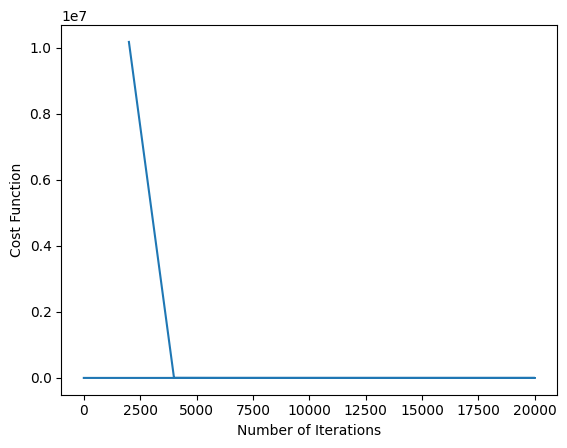

In [ ]:
plt.plot(itera,cf)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.show()

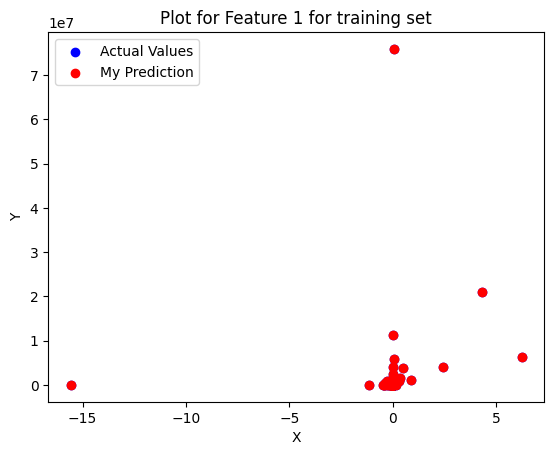

In [ ]:
plt.scatter(x[0:100,-3],y[0:100],c="b",label="Actual Values")
plt.scatter(x[0:100,-3],y_hat[0:100],c="r",label="My Prediction")
plt.title("Plot for Feature 1 for training set")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
y_avg=np.average(y)
r2=0
num=0
dem=0
m=np.shape(y)[0]
for i in range(m):
  num+=(y_hat[i]-y[i])**2
  dem+=(y_avg-y[i])**2
r2=1-(num/dem)
print(r2)
print("As r2 is pretty good we can finalise it here.")

1.0
As r2 is pretty good we can finalise it here.


In [ ]:
y_cv_hat=np.zeros((5000,))
for i in range(5000):
  y_cv_hat[i]=np.dot(w,x_cv[i,:])+b

In [ ]:
y_cv_avg=np.average(y_cv)
r2=0
num=0
dem=0
m=np.shape(y_cv)[0]
for i in range(m):
  num+=(y_cv_hat[i]-y_cv[i])**2
  dem+=(y_cv_avg-y_cv[i])**2
r2=1-(num/dem)
print(r2)

1.0


As we can see that the r2 value is pretty good and almost same for the training and cross validation set. Hence we can finalise it

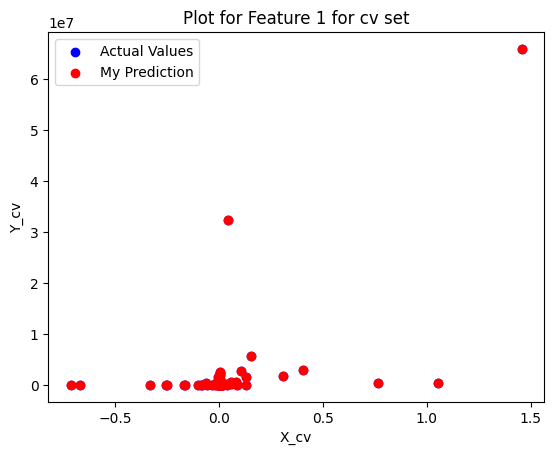

In [ ]:
plt.scatter(x_cv[0:100,-3],y_cv[0:100],c="b",label="Actual Values")
plt.scatter(x_cv[0:100,-3],y_cv_hat[0:100],c="r",label="My Prediction")
plt.title("Plot for Feature 1 for cv set")
plt.xlabel("X_cv")
plt.ylabel("Y_cv")
plt.legend()
plt.show()

In [ ]:
#now use test data
data_table_test=pd.read_csv("/content/drive/MyDrive/Datasets/Polynomialdata_test.csv")
data_test=data_table_test.to_numpy()
x_test_total=data_test[:,1:]
x_total=poly_generator(6,x_test_total)
x_test=z_score_normalization(x_total)

In [ ]:
y_test=np.zeros((10000,))
for i in range(10000):
  y_test[i]=np.dot(w,x_test[i,:])+b

In [ ]:
y_final=pd.DataFrame(y_test)

In [ ]:
y_final.to_csv("Result_Polynomial_test.csv")

In [ ]:
from google.colab import files
files.download('Result_Polynomial_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>